This notebook focuses on exploratory data analysis (EDA) of the 'metadata.csv' file.

In [55]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
import os
path_to_metadatacsv = os.path.realpath('../train/data/metadata.csv')
print(path_to_metadatacsv)

D:\ProjectMLDataScience\human-age-detection\train\data\metadata.csv


In [57]:
# Initialize an empty list to store rows
rows = [] 

# Open the CSV file
with open(path_to_metadatacsv, 'r') as file:
    # Read the CSV file
    read_metadatacsv = csv.reader(file)
    
    # File preview (column names, rows)
    # Get column names (header) from the first row
    column_names = next(read_metadatacsv)

    # Iterate through each row and append to the 'rows' list
    for row in read_metadatacsv:
        rows.append(row)

print("Column names:", column_names)

# Print the first 10 rows as a preview
for row in rows[:10]:
    print(row)

Column names: ['age', 'gender', 'path', 'face_score1']
['68', 'male', 'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\imdb_crop/01/nm0000001_rm946909184_1899-5-10_1968.jpg', '1.872117169344902']
['68', 'male', 'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\imdb_crop/01/nm0000001_rm980463616_1899-5-10_1968.jpg', '1.1587657871914132']
['79', 'female', 'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\imdb_crop/02/nm0000002_rm1346607872_1924-9-16_2004.jpg', '3.4791889134154426']
['79', 'female', 'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\imdb_crop/02/nm0000002_rm1363385088_1924-9-16_2004.jpg', '3.87017062712482']
['49', 'female', 'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\imdb_crop/02/nm0000002_rm221957120_1924-9-16_1974.jpg', '4.0964305784174595']
['82', 'female', 'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\imdb_crop/02/nm0000002_rm2287049216_1924-9-16_2007.jpg', '3.482030102193067']
['49', 'female

In [58]:
# Load the CSV file into the DataFrame
df_metadata = pd.read_csv(path_to_metadatacsv)

# Display the first 5 rows of the DataFrame 'df_metadata'
df_metadata.head()

,age,gender,path,face_score1
0,68,male,D:\ProjectMLDataScience\human-age-detection\tr...,1.872117
1,68,male,D:\ProjectMLDataScience\human-age-detection\tr...,1.158766
2,79,female,D:\ProjectMLDataScience\human-age-detection\tr...,3.479189
3,79,female,D:\ProjectMLDataScience\human-age-detection\tr...,3.870171
4,49,female,D:\ProjectMLDataScience\human-age-detection\tr...,4.096431


In [59]:
# Check if the number of lines generated in the csv file is correct, compare with file 'read_imdb_wiki_crop.ipynb'
df_metadata.shape

(224840, 4)

In [74]:
# Count occurrences and calculate the ratio of female and male gender in the DataFrame

# Specify the column containing gender information
column_gender = 'gender'

# Count the occurrences of each gender
value_counts = df_metadata[column_gender].value_counts()

# Calculate the ratio of each gender occurrence relative to the total number of rows
ratio_counts = value_counts / len(df_metadata)

# Iterate through the gender values, counts, and ratios, and print the results
for value, count, ratio in zip(value_counts.index, value_counts, ratio_counts):
    print(f"Value: {value}, Number of appearances: {count}, Ratio: {ratio:.2%}")

Value: male, Number of appearances: 129729, Ratio: 57.70%
Value: female, Number of appearances: 95111, Ratio: 42.30%


In [83]:
unique = df_metadata['age'].unique()
for value in unique:
    if value > 120:
        print(value)

133
130
124
140
268
184
123
186
151
211
429
256
249
156
149
209


In [61]:
max(df_metadata['age']) # WTF XD

429

In [ ]:
# przejdz po wszystkich rekordach dataframu gdxie jest powyzej 105 roku zycia, sprawdz NaN
# UNIQUE VALUES , sprawdz dla dtafrmae czy w kolumnie gender i age jest cos innego 

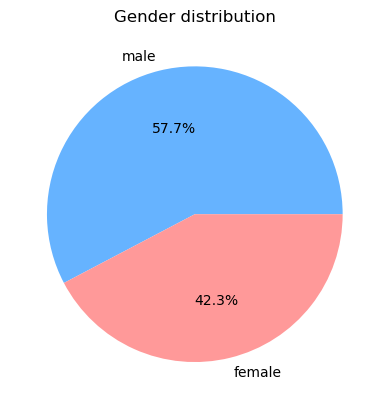

In [62]:
import matplotlib.pyplot as plt 
# Visualizing the gender distribution using a pie chart

# Extract the 'gender' column from the DataFrame and count the occurrences of each gender
gender_counts = df_metadata['gender'].value_counts()

# Plot a pie chart with the gender distribution
gender_counts.plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])

plt.title('Gender distribution')

# Remove the y-axis label
plt.ylabel('')


plt.show()

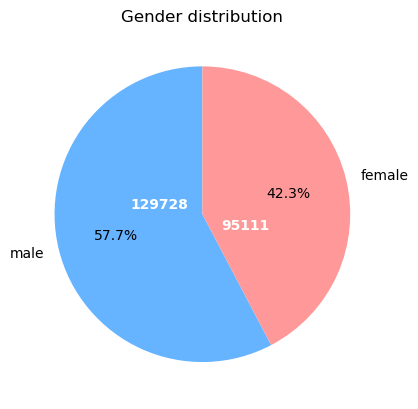

In [63]:
# Visualizing the gender distribution using a pie chart with percentages and counts

# Extract the 'gender' column from the DataFrame and count the occurrences of each gender
gender_counts = df_metadata['gender'].value_counts()

# Plot a pie chart with the gender distribution
pie_chart = gender_counts.plot.pie(colors=['#66b3ff', '#ff9999'], autopct='%1.1f%%', startangle=90)

plt.title('Gender distribution')

plt.ylabel('')

# Add counts inside each wedge with an offset below the chart
for wedge in pie_chart.patches:
    angle = (wedge.theta2 - wedge.theta1)
    percentage = angle / 360.0
    count = int(percentage * len(df_metadata))

    # Offset to avoid overlapping, moving the text below the chart
    offset_x = wedge.center[0] + 0.3 * np.cos(np.radians((wedge.theta1 + wedge.theta2) / 2))
    offset_y = wedge.center[1] - 0.3 * np.sin(np.radians((wedge.theta1 + wedge.theta2) / 2))

    pie_chart.annotate(f"{count}",
                       (offset_x, offset_y),
                       ha='center', va='center', fontsize=10, color='white', weight='bold')

plt.show()

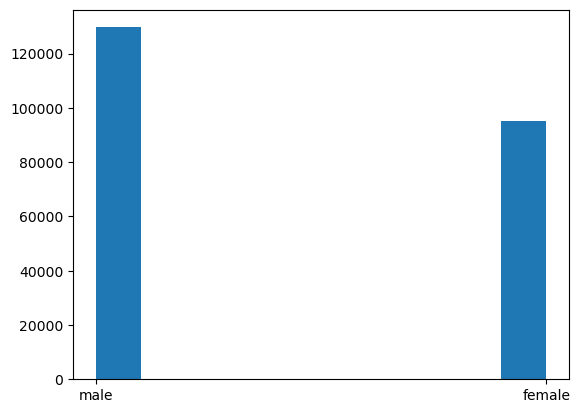

In [64]:
plt.hist(df_metadata['gender'])
plt.show()

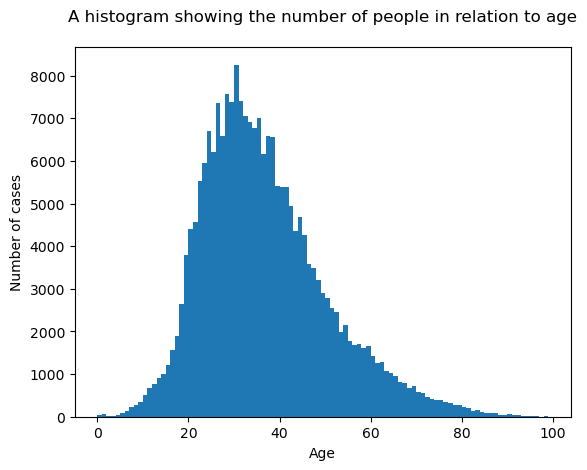

In [65]:
import matplotlib.pyplot as plt
plt.hist(df_metadata['age'], range(100))
plt.xlabel('Age')
plt.ylabel('Number of cases')
plt.title('A histogram showing the number of people in relation to age\n')
plt.show()

In [66]:
df_metadata.values


array([[68, 'male',
        'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\imdb_crop/01/nm0000001_rm946909184_1899-5-10_1968.jpg',
        1.872117169344902],
       [68, 'male',
        'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\imdb_crop/01/nm0000001_rm980463616_1899-5-10_1968.jpg',
        1.1587657871914132],
       [79, 'female',
        'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\imdb_crop/02/nm0000002_rm1346607872_1924-9-16_2004.jpg',
        3.4791889134154426],
       ...,
       [25, 'male',
        'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\wiki_crop/49/9996949_1937-04-17_1963.jpg',
        4.029267756985114],
       [40, 'male',
        'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\wiki_crop/09/9998109_1972-12-27_2013.jpg',
        3.4943031690208564],
       [53, 'female',
        'D:\\ProjectMLDataScience\\human-age-detection\\train\\data\\wiki_crop/80/999980_1954-06-11_2008.jpg',
        5.

In [67]:
# Create an 'age category' column to illustrate and divide the number of faces with a given detected age into groups

df_metadata_with_agecategory = df_metadata[['age', 'gender', 'path', 'face_score1']]

bins = [1, 19, 39, 59, 79, 120] # Define age category boundaries
labels = ['1-19', '20-39', '40-59', '60-79', '80-120'] # Define labels for each age category
df_metadata_with_agecategory['age category'] = pd.cut(df_metadata_with_agecategory['age'], bins=bins, labels=labels, right=True) # Add a new column 'age category' to the DataFrame
pd.DataFrame(df_metadata_with_agecategory[:20]) # DataFrame with a new column

,age,gender,path,face_score1,age category
0,68,male,D:\ProjectMLDataScience\human-age-detection\tr...,1.872117,60-79
1,68,male,D:\ProjectMLDataScience\human-age-detection\tr...,1.158766,60-79
2,79,female,D:\ProjectMLDataScience\human-age-detection\tr...,3.479189,60-79
3,79,female,D:\ProjectMLDataScience\human-age-detection\tr...,3.870171,60-79
4,49,female,D:\ProjectMLDataScience\human-age-detection\tr...,4.096431,40-59
5,82,female,D:\ProjectMLDataScience\human-age-detection\tr...,3.482030,80-120
6,49,female,D:\ProjectMLDataScience\human-age-detection\tr...,4.865421,40-59
7,81,female,D:\ProjectMLDataScience\human-age-detection\tr...,5.414545,80-120
8,81,female,D:\ProjectMLDataScience\human-age-detection\tr...,4.360469,80-120
9,79,female,D:\ProjectMLDataScience\human-age-detection\tr...,3.559209,60-79


In [68]:
women_age = df_metadata_with_agecategory.loc[df_metadata_with_agecategory['gender'] == 'female', 'age']
men_age = df_metadata_with_agecategory.loc[df_metadata_with_agecategory['gender'] == 'male', 'age']

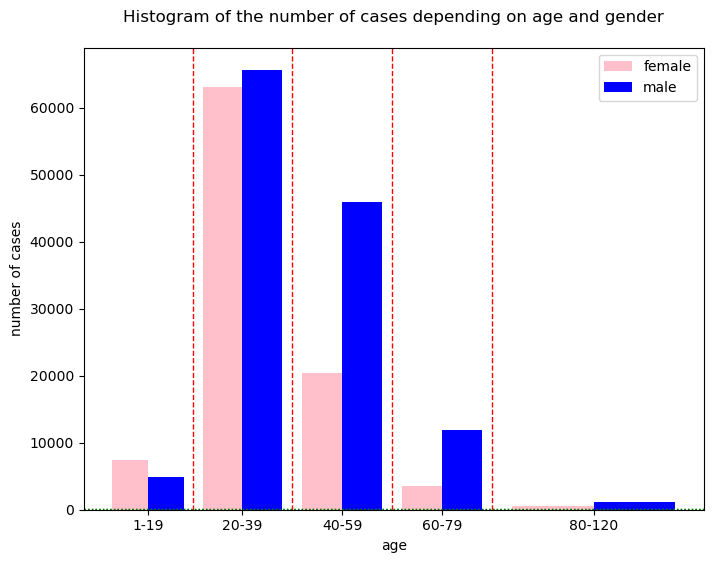

In [73]:
# Create a histogram of the number of cases depending on age and gender
plt.figure(figsize=(8, 6))
plt.hist([women_age, men_age], bins=bins, color=['pink', 'blue'], label=['female', 'male'])

bin_centers = 0.5 * np.diff(bins) + bins[:-1] # Use 'bin_centers' to get the center of each age range as a place for the label. This should correct the unevenness of the labels on the X axis
for bin_edge in bins[1:-1]:
    plt.axvline(x=bin_edge, color='red', linestyle='--', linewidth=1)

x_ticks = [25, 35, 50]
for x_tick in x_ticks:
    plt.axhline(y=x_tick, color='green', linestyle=':', linewidth=1)
    
plt.xticks(bin_centers, labels)
plt.xlabel('age')
plt.ylabel('number of cases')
plt.title('Histogram of the number of cases depending on age and gender\n')
plt.legend()
plt.show()

In [70]:
# Check the correctness of the chart. Compare values 
selected_rows = df_metadata_with_agecategory.loc[(df_metadata_with_agecategory['age category'] == '40-59') & (df_metadata_with_agecategory['gender'] == 'female')]
selected_rows.info() # 9720 entries: good

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18755 entries, 4 to 224839
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           18755 non-null  int64   
 1   gender        18755 non-null  object  
 2   path          18755 non-null  object  
 3   face_score1   18755 non-null  float64 
 4   age category  18755 non-null  category
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 751.1+ KB


In [71]:
# List of image files in the directory
image_files = [f for f in os.listdir(directory) if f.endswith('.jpg')]

NameError: name 'directory' is not defined

In [ ]:
len(image_files) # Number of image files in the directory

0

In [ ]:
# This function is used to display several (user-specified number) images from the selected directory
def display_images(images, num_cols=4):
    num_images = len(images)
    num_rows = (num_images + num_cols - 1) // num_cols
    plt.figure(figsize=(12, 8))
    for i, image_file in enumerate(images):
        img = Image.open(os.path.join(directory, image_file))
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img)
        plt.title(image_file, fontdict = {'fontsize' : 6})
        plt.axis('off')
    plt.show()

In [ ]:
display_images(image_files[:4])

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Przykładowe statystyki o obrazach
for image_file in image_files[:8]:
    img = Image.open(os.path.join(directory, image_file))
    width, height = img.size
    mode = img.mode
    print(f'File name: {image_file}, Size: {width}x{height}, Mode: {mode}')

File name: nm0000100_rm1001569280_1955-1-6_2011.jpg, Size: 500x500, Mode: RGB
File name: nm0000100_rm1002674432_1955-1-6_2003.jpg, Size: 171x171, Mode: RGB
File name: nm0000100_rm1018346496_1955-1-6_2011.jpg, Size: 315x315, Mode: RGB
File name: nm0000100_rm1019451648_1955-1-6_2003.jpg, Size: 252x252, Mode: RGB
File name: nm0000100_rm103389184_1955-1-6_2005.jpg, Size: 334x334, Mode: RGB
File name: nm0000100_rm1035123712_1955-1-6_2011.jpg, Size: 334x500, Mode: RGB
File name: nm0000100_rm1036228864_1955-1-6_2003.jpg, Size: 105x106, Mode: RGB
File name: nm0000100_rm1051900928_1955-1-6_2011.jpg, Size: 500x500, Mode: RGB


In [ ]:
mean_color = np.mean(image_file, axis=(0, 1))
print(f"Średni kolor (BGR) {image_file}: {mean_color}")

AxisError: axis 0 is out of bounds for array of dimension 0